# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [ ]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [1]:
import requests

# URL de la página web
url = "https://companies-market-cap-copy.vercel.app/index.html"

# Descargar el contenido HTML
response = requests.get(url)
html_content = response.text

print("HTML descargado correctamente.")

HTML descargado correctamente.


In [2]:
from bs4 import BeautifulSoup

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Buscar todas las tablas en el HTML
tables = soup.find_all("table")

# Encontrar la tabla correcta (asumimos que es la primera tabla)
table = tables[0]

# Extraer las filas de la tabla
rows = table.find_all("tr")

# Crear una lista para almacenar los datos
data = []

# Recorrer las filas y extraer los datos
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 0:  # Ignorar filas vacías
        year = cells[0].text.strip()
        revenue = cells[1].text.strip()
        data.append([year, revenue])

# Convertir la lista en un DataFrame
import pandas as pd

df = pd.DataFrame(data, columns=["Año", "Ingresos (B)"])

print("Datos extraídos y convertidos a DataFrame:")
print(df)

Datos extraídos y convertidos a DataFrame:
     Año Ingresos (B)
0   2024     $97.15 B
1   2023     $96.77 B
2   2022     $81.46 B
3   2021     $53.82 B
4   2020     $31.53 B
5   2019     $24.57 B
6   2018     $21.46 B
7   2017     $11.75 B
8   2016      $7.00 B
9   2015      $4.04 B
10  2014      $3.19 B
11  2013      $2.01 B
12  2012      $0.41 B
13  2011      $0.20 B
14  2010      $0.11 B
15  2009      $0.11 B


In [3]:
# Limpiar la columna de ingresos
df["Ingresos (B)"] = df["Ingresos (B)"].str.replace("$", "").str.replace("B", "")

# Convertir la columna de ingresos a tipo numérico
df["Ingresos (B)"] = pd.to_numeric(df["Ingresos (B)"])

# Eliminar filas vacías o con valores nulos
df.dropna(inplace=True)

print("DataFrame limpio:")
print(df)

DataFrame limpio:
     Año  Ingresos (B)
0   2024         97.15
1   2023         96.77
2   2022         81.46
3   2021         53.82
4   2020         31.53
5   2019         24.57
6   2018         21.46
7   2017         11.75
8   2016          7.00
9   2015          4.04
10  2014          3.19
11  2013          2.01
12  2012          0.41
13  2011          0.20
14  2010          0.11
15  2009          0.11


In [5]:
import sqlite3

# Conectar a la base de datos (se creará si no existe)
conn = sqlite3.connect("tesla.db")
cursor = conn.cursor()

# Crear la tabla
cursor.execute("""
CREATE TABLE IF NOT EXISTS ingresos_tesla (
    año INTEGER PRIMARY KEY,
    ingresos_billones REAL
)
""")

# Insertar los datos en la tabla
for index, row in df.iterrows():
    cursor.execute("""
    INSERT INTO ingresos_tesla (año, ingresos_billones)
    VALUES (?, ?)
    """, (row["Año"], row["Ingresos (B)"]))

# Guardar los cambios
conn.commit()

print("Datos almacenados en la base de datos SQLite.")

Datos almacenados en la base de datos SQLite.


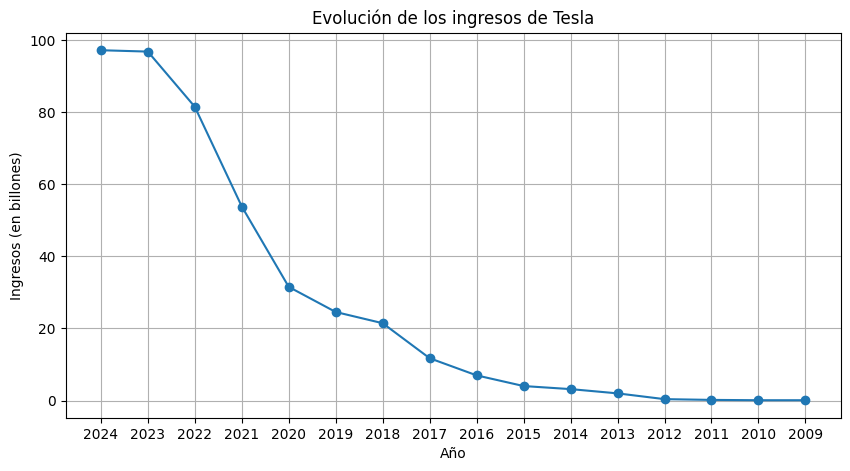

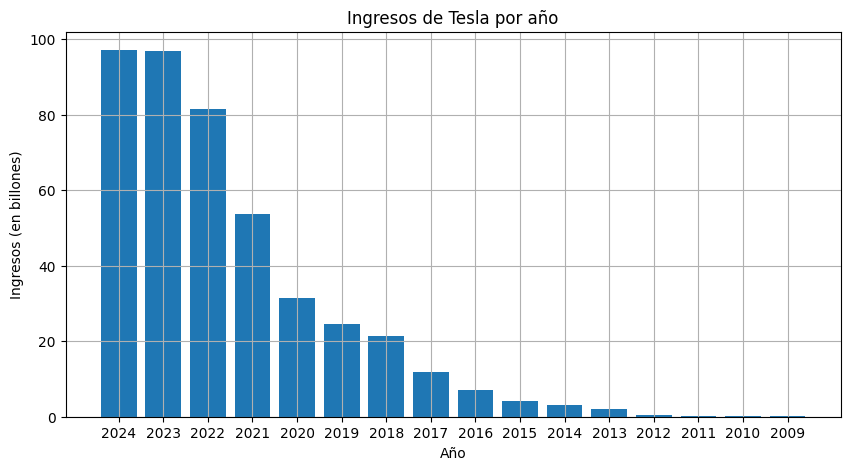

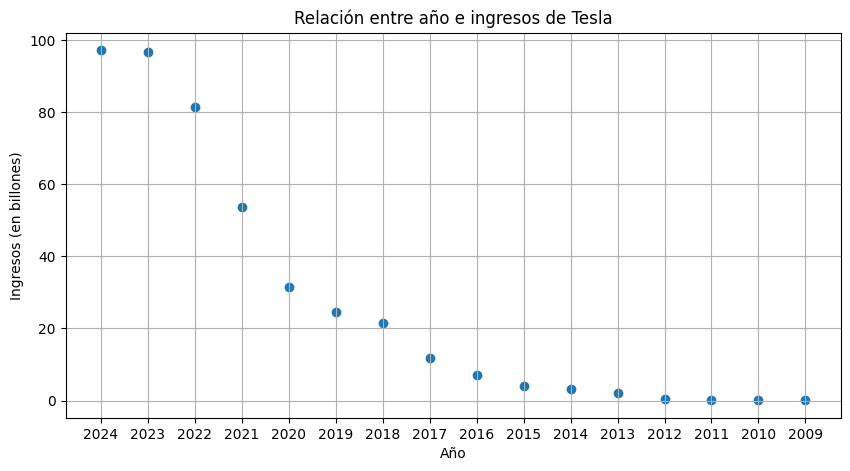

In [6]:
import matplotlib.pyplot as plt

# Gráfico de líneas
plt.figure(figsize=(10, 5))
plt.plot(df["Año"], df["Ingresos (B)"], marker="o")
plt.title("Evolución de los ingresos de Tesla")
plt.xlabel("Año")
plt.ylabel("Ingresos (en billones)")
plt.grid(True)
plt.show()

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df["Año"], df["Ingresos (B)"])
plt.title("Ingresos de Tesla por año")
plt.xlabel("Año")
plt.ylabel("Ingresos (en billones)")
plt.grid(True)
plt.show()

# Gráfico de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(df["Año"], df["Ingresos (B)"])
plt.title("Relación entre año e ingresos de Tesla")
plt.xlabel("Año")
plt.ylabel("Ingresos (en billones)")
plt.grid(True)
plt.show()

In [7]:
# URL de la página de ganancias
url_earnings = "https://companies-market-cap-copy.vercel.app/earnings.html"

# Descargar el contenido HTML
response_earnings = requests.get(url_earnings)
html_earnings = response_earnings.text

# Parsear el HTML con BeautifulSoup
soup_earnings = BeautifulSoup(html_earnings, "html.parser")

# Buscar la tabla de ganancias
table_earnings = soup_earnings.find_all("table")[0]

# Extraer las filas de la tabla
rows_earnings = table_earnings.find_all("tr")

# Extraer los datos del último año
last_year_data = rows_earnings[-1].find_all("td")
last_year = last_year_data[0].text.strip()
last_year_earnings = last_year_data[1].text.strip()

print(f"Ganancias del último año ({last_year}): {last_year_earnings}")

Ganancias del último año (2009): -$53.19 Million
